# Logistic Regression

In [29]:
# used for manipulating directory paths
import os
# Scientific and vector computation for python and somehow like MATLAB
import numpy as np
# Plotting library
from matplotlib import pyplot
# Optimization module in scipy
from scipy import optimize
import utils

## Student exams simple dataset:

In [30]:
data = np.loadtxt(os.path.join('Data', 'data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

### Visualizing the data

In [31]:
def plotData(X, y):
    # Create New Figure
    fig = pyplot.figure()

    pos = np.where(y==1) # something like If-else 
    neg = np.where(y==0)

    # plot! [0] indexing at end necessary for proper legend creation in ex2.py
    p1 = pyplot.plot(X[pos,0], X[pos,1], marker='*', markersize=9, color='r')[0]
    p2 = pyplot.plot(X[neg,0], X[neg,1], marker='o', markersize=7, color='b')[0]

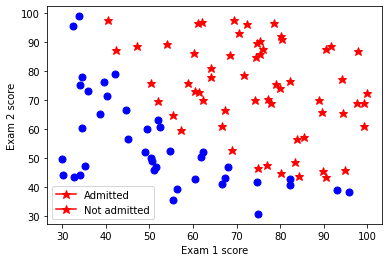

In [32]:
plotData(X, y)
# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])
pass

#### Sigmoid function

Logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$

In [33]:
def sigmoid(z):
    # convert input to a numpy array
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1.0 / (1+np.exp(-1*z))
    return g

In [34]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


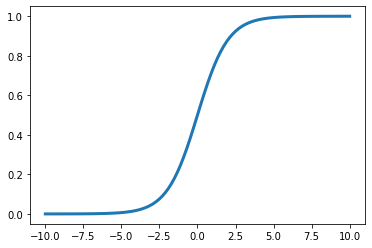

In [35]:
x1 = np.linspace(-10., 10., 100)
y1 = 1.0 / (1+np.exp(-1*x1))
pyplot.plot(x1, y1, lw=3)
pyplot.show()

<a id="section2"></a>
#### Cost function and gradient

Now, the cost function and gradient for logistic regression will be implemented

In [36]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape # row and column of the matrix respectievly

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
<a id="costFunction"></a>

In [37]:
def costFunction(theta, X, y):
    m = y.size 
    J = 0
    grad = np.zeros(theta.shape)
    
    one = y * np.transpose(np.log(sigmoid(np.dot(X,theta))))
    two = (1-y) * np.transpose(np.log(1 - sigmoid( np.dot(X, theta))))
    J = -(1./m) * (one + two).sum()
    grad = (1./m) * np.dot(sigmoid( np.dot(X, theta) ).T - y, X).T

    return J, grad

In [47]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))

Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Cost at test theta: 0.218
Gradient at test theta:
	[0.043, 2.566, 2.647]


In [48]:
# set options for optimize.minimize
options= {'maxiter': 400}
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the value of costFunction at optimized theta
cost = res.fun
# the optimized theta is in the x property
theta = res.x

print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('theta:\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Cost at theta found by optimize.minimize: 0.203
theta:	[-25.161, 0.206, 0.201]


## Plot Decision Boundary

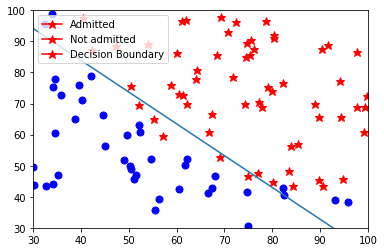

In [49]:
# Plot Boundary
utils.plotDecisionBoundary(plotData, theta, X, y)

In [50]:
def predict(theta, X):
    
    m = X.shape[0] # Number of training examples, ROW
    p = np.zeros(m)

    sigValue = sigmoid(np.dot(X, theta))
    p = sigValue >= 0.5
    return p

In [52]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

For a student with scores 45 and 85,we predict an admission probability of 0.776
Train Accuracy: 89.00 %


## Regularized logistic regression

In [53]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data', 'data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]

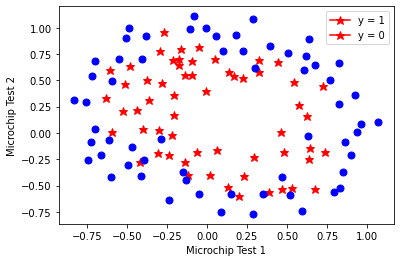

In [54]:
# Visualize the data
plotData(X, y)
# Labels and Legend
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')

# Specified in plot order
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pass

<a id="section5"></a>
### Cost function and gradient

Now implement code to compute the cost function and gradient for regularized logistic regression. 

Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$


$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
<a id="costFunctionReg"></a>

In [55]:
X = utils.mapFeature(X[:, 0], X[:, 1])

In [56]:
def costFunctionReg(theta, X, y, lambda_):

    m = y.size  # number of training examples
    J = 0 # return the following variables correctly 
    grad = np.zeros(theta.shape)

    h = sigmoid(np.dot(X,theta))
    
    one = y * np.transpose(np.log(h))
    two = (1-y) * np.transpose(np.log(1 - h))
    reg = (float(lambda_)/(2*m)) * np.power(theta[1:theta.shape[0]], 2).sum()
    J = -(1./m)*(one+two).sum()+ reg

    grad = (1./m)*np.dot(h.T - y, X).T + (float(lambda_) / m )*theta
    return J, grad

In [58]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])
lambda_ = 1

cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Gradient at test theta - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
------------------------------

Cost at test theta    : 3.16
Gradient at test theta - first five values only:
	[0.4308, 0.1614, 0.1948, 0.2269, 0.0922]


## Plotting the decision boundary

C:\Users\Razi\Desktop\Codes\logistic regression\utils.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(out)


Train Accuracy: 83.1 %


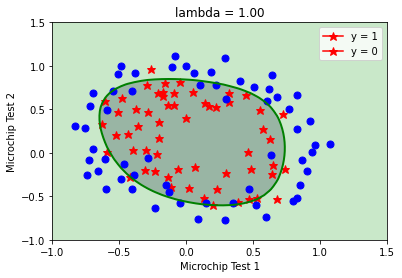

In [59]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

utils.plotDecisionBoundary(plotData, theta, X, y)
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')
pyplot.legend(['y = 1', 'y = 0'])
pyplot.grid(False)
pyplot.title('lambda = %0.2f' % lambda_)

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))